<a href="https://colab.research.google.com/github/ZKisielewska/learning-git-task/blob/master/M_9_2_Data_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Prepare appropriate charts and visualizations, and then form your opinion on the following issues.

1. Is there a relationship between who is the direct supervisor (**ManagerName, ManagerID**) of a given employee and the performance score (**PerformanceScore**)?
2. What **Recruitment Sources** are the best if we care about the longest employee seniority?
3. Does the employee's marital status (**MartialDesc**) correlate in any way with job satisfaction (**EmpSatisfaction**)?
4. What is the age structure of currently employed employees?
5. Do older workers work on more special projects than younger workers?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

sns.set_style('darkgrid')

In [ ]:
df = pd.read_csv('https://uploads.kodilla.com/bootcamp/pro-data-visualization/files/HRDataset.csv')
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,0.0,1.0,Accountant I,MA,1450.0,11/24/87,F,Married,US Citizen,No,Black or African American,10/27/2008,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,0.0,1.0,Accountant I,MA,1460.0,04/26/84,M,Divorced,US Citizen,No,Black or African American,1/6/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,0.0,1.0,Accountant I,MA,2703.0,09/01/86,M,Single,US Citizen,No,White,9/29/2014,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,1.0,2.0,Administrative Assistant,MA,2170.0,09/16/85,F,Married,US Citizen,No,White,2/16/2015,04/15/15,NaN,Terminated for Cause,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,0.0,2.0,Administrative Assistant,MA,2330.0,05/19/88,F,Single,US Citizen,No,White,5/1/2015,NaN,N/A - still employed,Active,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0


### **1.** Is there a relationship between who is the direct supervisor (**ManagerName, ManagerID**) of a given employee and the performance score (**PerformanceScore**)?

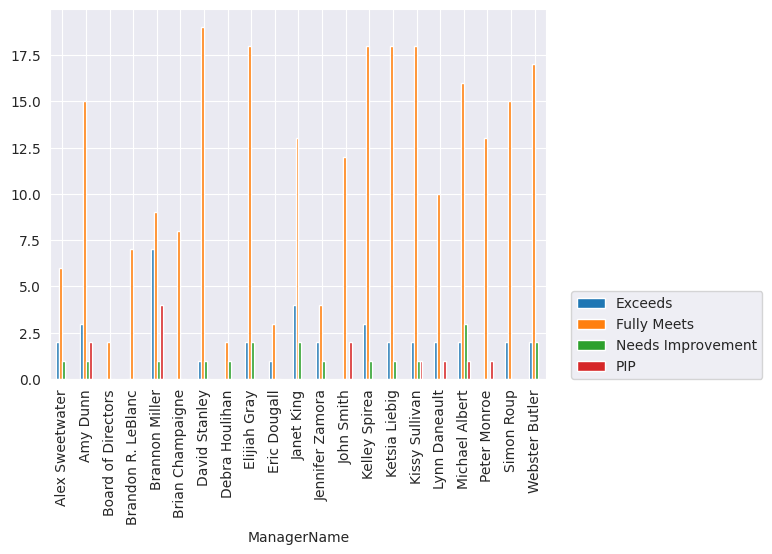

In [ ]:
performance_by_manager = pd.crosstab(df['ManagerName'], df['PerformanceScore'])
ax = performance_by_manager.plot.bar()
ax.legend(loc=(1.05,0.0))

We can see that there is a rather weak correlation between the direct Manager and the Scores given to employee. Each manager gives mainly the highest scores (Fully Meets) to employees. Among them, Board of Directors, B. LeBlanc, B. Champaigne stand out, who only give the highest scores and D. Houlihan with P. Monroe, who gives both: the highest (Fully Meets) and the lowest (PIP).

### **2.** What **Recruitment Sources** are the best if we care about the longest employee seniority?

In [ ]:
# covert data to datetime type
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [ ]:
# count seniority of empoyees
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(1,'Y')

In [ ]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

<Axes: xlabel='Seniority', ylabel='RecruitmentSource'>

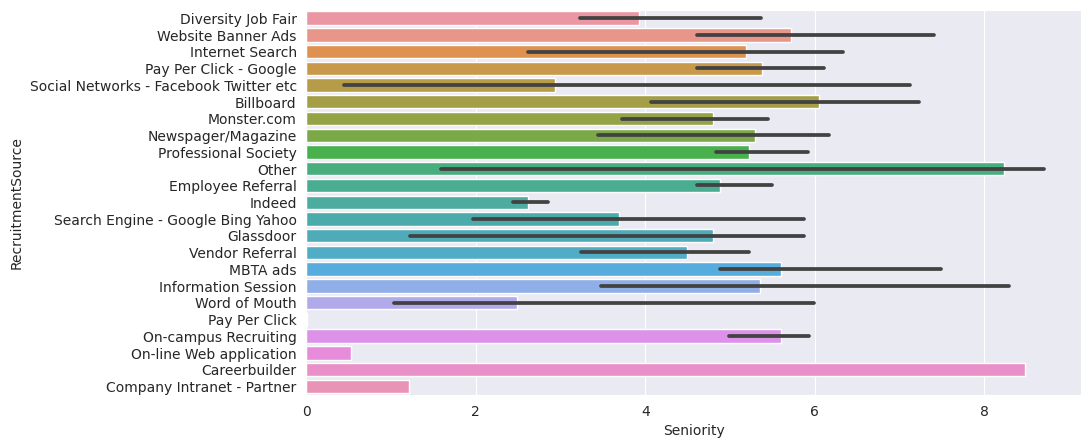

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='Seniority',y='RecruitmentSource',data=df,estimator=np.median)

It seems that the best source of recruitment an employee is '**Other**'. However, this is misleading because we do not know what sources fall into this group. We can assume that 'Website Banner Ads', 'Bilboard' and 'On-campus Recruiting' are the quite good sources to recruit employees.

### **3.** Does the employee's marital status (**MartialDesc**) correlate in any way with job satisfaction (**EmpSatisfaction**)?

<Axes: xlabel='MaritalDesc', ylabel='EmpSatisfaction'>

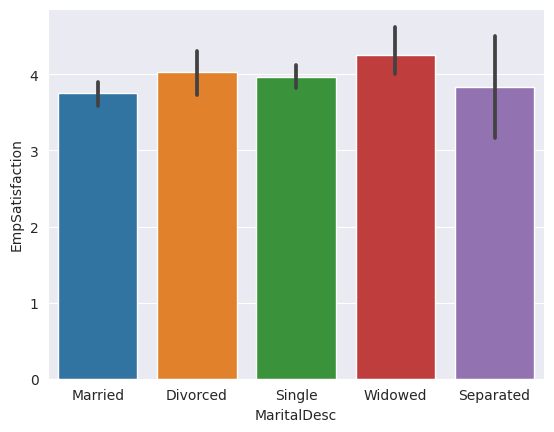

In [ ]:
sns.barplot(x='MaritalDesc',y='EmpSatisfaction',data=df)

Observations show that **'Widowed'** are the most satisfied group of employees, while '**Married**' people seem to be the least satisfied with their job. However, the correlation seems to be small between the compared groups.

### **4.** What is the age structure of currently employed employees?

In [ ]:
def count_age(row):
    end_date = dt.datetime(2019,9,27)
    return (end_date - row['DOB'])/np.timedelta64(1,'Y')

In [ ]:
df['age'] = df.apply(lambda row: count_age(row),axis =1)

In [ ]:
df[['DOB','age']].head()

,DOB,age
0,1987-11-24,31.841858
1,1984-04-26,35.420303
2,1986-09-01,33.071179
3,1985-09-16,34.029446
4,1988-05-19,31.357249


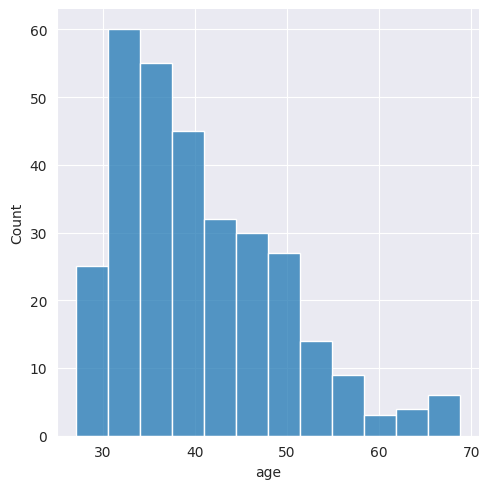

In [ ]:
sns.displot(df['age'])

We can see that the largest group of employees is in the 30-40 age group. After the age of 50, the ratios of employed workers decrease significantly. 

### **5.** Do older workers work on more special projects than younger workers?

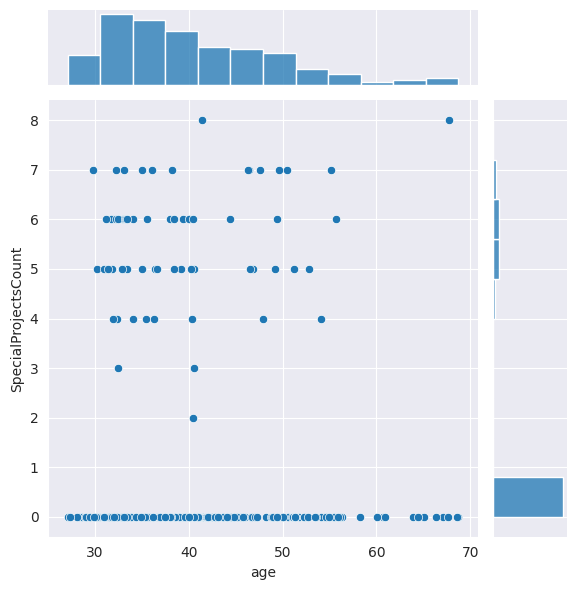

In [ ]:
sns.jointplot(x='age',y='SpecialProjectsCount',data=df)

We can see that older employees do not work on more special projects then the younger ones. The most number of special project are worked by employees between 30 and 40 years ald.